# Assignment 2

First, setup requires running the setup.sh file

#### Vectorizer

In [1]:
from assignment2 import vectorizer
vectorizer()

#### Logistic regression classifier

FAKE				REAL

-4.9501	october        		4.5541	candidates     
-4.4089	hillary        		4.3354	but            
-4.0623	by             		3.2131	cruz           
-3.1702	november       		2.8834	conservative   
-2.6735	election       		2.8471	state          
-2.6301	email          		2.6564	gop            
-2.6085	us             		2.5974	tax            
-2.5315	com            		2.5788	that           
-2.4291	your           		2.4906	republicans    
-2.3087	however        		2.4730	sen            
-2.1925	you            		2.4414	fox            
-2.0541	voting         		2.3175	sanders        
-2.0321	russia         		2.2729	percent        
-1.9831	just           		2.2591	tuesday        
-1.8445	fbi            		2.2393	iran           
-1.8401	hillary clinton		2.2204	says           
-1.7993	this           		2.1515	debate         
-1.6674	of             		2.1276	republican     
-1.6213	see            		2.0681	attacks        
              precision    recall  f1-score   support

        FAKE       

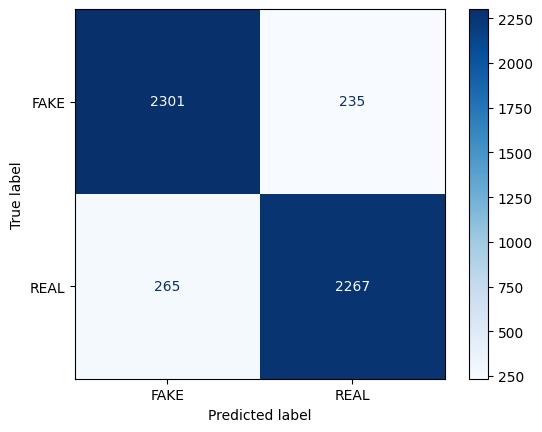

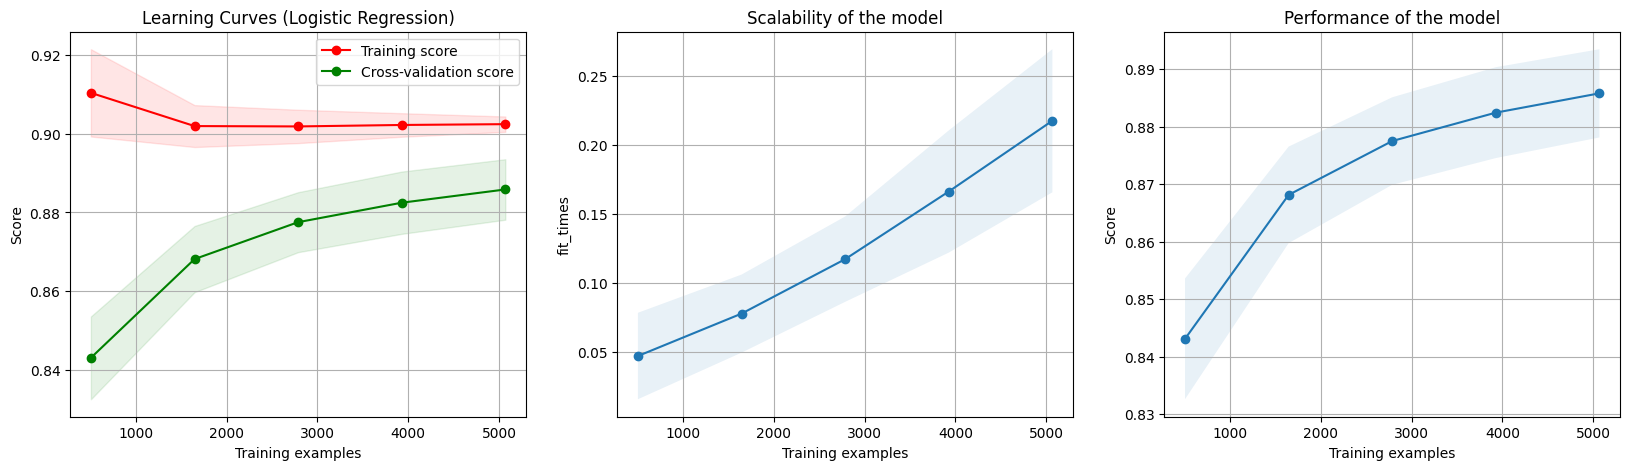

Hillary Clinton is a crook who eats babies!
['FAKE']


In [2]:
# running the logistic regression model, which uses the vectorizer
# this function will print: 
    # the 20 most informative features, 
    # a classification report (which can also be viewed in the output folder), 
    # a confusion matrix,
    # graphs for cross validation, and
    # the final prediction for the test sentence.
from assignment2 import logisticregression
logisticregression()

#### Neural network classifier

              precision    recall  f1-score   support

        FAKE       0.90      0.87      0.88       628
        REAL       0.87      0.90      0.89       639

    accuracy                           0.89      1267
   macro avg       0.89      0.89      0.89      1267
weighted avg       0.89      0.89      0.89      1267



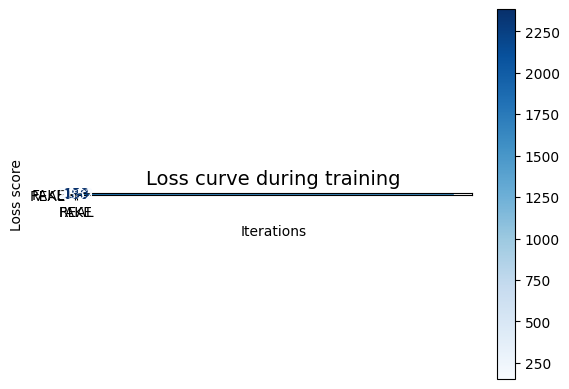

Hillary Clinton is a crook who eats babies!
['FAKE']


In [4]:
# running the neural network model, which uses the vectorizer
# this function will print: 
    # a classification report (which can also be viewed in the output folder), 
    # a confusion matrix,
    # a loss curve plot, and
    # the final prediction for the test sentence.
from assignment2 import neuralnetwork
neuralnetwork()